In [1]:
import pandas as pd
import numpy as np

## 전처리

In [2]:
df1 = pd.read_csv("./holiday.csv")
df2 = pd.read_csv("./total.csv")

In [3]:
df1

,date,dateName
0,2004-07-17,제헌절
1,2004-08-15,광복절
2,2004-09-27,추석
3,2004-09-28,추석
4,2004-09-29,추석
...,...,...
62,2008-09-13,추석
63,2008-09-14,추석
64,2008-09-15,추석
65,2008-10-03,개천절


In [4]:
df2

,Unnamed: 0,date,day,paid_total,free_total,sum
0,0,07월01일,목,2250,633,2883
1,1,07월02일,금,1095,567,1662
2,2,07월03일,토,5087,813,5900
3,3,07월04일,일,536,255,791
4,4,07월05일,월,1236,773,2009
...,...,...,...,...,...,...
1640,1640,12월27일,토,2632,1070,3702
1641,1641,12월28일,일,5317,1147,6464
1642,1642,12월29일,월,1337,677,2014
1643,1643,12월30일,화,912,777,1689


In [5]:
# 날짜 데이터 날짜 date type으로 만들기
df_date = pd.date_range('2004-07-01','2008-12-31')
df_date = pd.DataFrame(df_date)
df_date

,0
0,2004-07-01
1,2004-07-02
2,2004-07-03
3,2004-07-04
4,2004-07-05
...,...
1640,2008-12-27
1641,2008-12-28
1642,2008-12-29
1643,2008-12-30


In [6]:
result = pd.concat([df_date,df2], axis=1)
result.drop(['Unnamed: 0','date'], axis=1, inplace= True)
result.columns = ['date','day','paid_total','free_total','sum']
result

,date,day,paid_total,free_total,sum
0,2004-07-01,목,2250,633,2883
1,2004-07-02,금,1095,567,1662
2,2004-07-03,토,5087,813,5900
3,2004-07-04,일,536,255,791
4,2004-07-05,월,1236,773,2009
...,...,...,...,...,...
1640,2008-12-27,토,2632,1070,3702
1641,2008-12-28,일,5317,1147,6464
1642,2008-12-29,월,1337,677,2014
1643,2008-12-30,화,912,777,1689


In [7]:
df1['날짜'] = pd.to_datetime(df1['date'])

In [8]:
df1

,date,dateName,날짜
0,2004-07-17,제헌절,2004-07-17
1,2004-08-15,광복절,2004-08-15
2,2004-09-27,추석,2004-09-27
3,2004-09-28,추석,2004-09-28
4,2004-09-29,추석,2004-09-29
...,...,...,...
62,2008-09-13,추석,2008-09-13
63,2008-09-14,추석,2008-09-14
64,2008-09-15,추석,2008-09-15
65,2008-10-03,개천절,2008-10-03


In [9]:
df1.drop(['date'], axis=1, inplace= True)
df1.rename(columns={'날짜':'date'},inplace=True)

In [10]:
merge_df = pd.merge(df1, result, how='outer', on='date')

In [11]:
merge_df

,dateName,date,day,paid_total,free_total,sum
0,제헌절,2004-07-17,토,3381,517,3898
1,광복절,2004-08-15,일,17981,1023,19004
2,추석,2004-09-27,월,22878,1255,24133
3,추석,2004-09-28,화,28168,1617,29785
4,추석,2004-09-29,수,35906,2480,38386
...,...,...,...,...,...,...
1641,NaN,2008-12-27,토,2632,1070,3702
1642,NaN,2008-12-28,일,5317,1147,6464
1643,NaN,2008-12-29,월,1337,677,2014
1644,NaN,2008-12-30,화,912,777,1689


In [12]:
df_sorted_by_values = merge_df.sort_values(by='date')

In [13]:
df_sorted_by_values

,dateName,date,day,paid_total,free_total,sum
67,NaN,2004-07-01,목,2250,633,2883
68,NaN,2004-07-02,금,1095,567,1662
69,NaN,2004-07-03,토,5087,813,5900
70,NaN,2004-07-04,일,536,255,791
71,NaN,2004-07-05,월,1236,773,2009
...,...,...,...,...,...,...
1641,NaN,2008-12-27,토,2632,1070,3702
1642,NaN,2008-12-28,일,5317,1147,6464
1643,NaN,2008-12-29,월,1337,677,2014
1644,NaN,2008-12-30,화,912,777,1689


In [14]:
df_sorted_by_values.drop_duplicates(subset = 'date')

,dateName,date,day,paid_total,free_total,sum
67,NaN,2004-07-01,목,2250,633,2883
68,NaN,2004-07-02,금,1095,567,1662
69,NaN,2004-07-03,토,5087,813,5900
70,NaN,2004-07-04,일,536,255,791
71,NaN,2004-07-05,월,1236,773,2009
...,...,...,...,...,...,...
1641,NaN,2008-12-27,토,2632,1070,3702
1642,NaN,2008-12-28,일,5317,1147,6464
1643,NaN,2008-12-29,월,1337,677,2014
1644,NaN,2008-12-30,화,912,777,1689


날씨데이터 추가

In [15]:
we = pd.read_csv("./weather_total.csv", encoding="cp949")
we

,Unnamed: 0,일시,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 최심신적설(cm),평균 전운량(1/10)
0,182,2004-07-01,24.0,7.37,4.5,1.9,77.0,NaN,10.0
1,183,2004-07-02,23.1,18.88,10.5,1.9,90.8,NaN,10.0
2,184,2004-07-03,24.4,7.42,10.5,1.0,85.9,NaN,10.0
3,185,2004-07-04,21.1,21.35,62.0,4.5,92.1,NaN,10.0
4,186,2004-07-05,22.8,6.75,14.0,3.8,80.5,NaN,9.9
...,...,...,...,...,...,...,...,...,...
1640,1822,2008-12-27,-3.0,NaN,NaN,1.4,43.0,NaN,3.0
1641,1823,2008-12-28,0.5,NaN,NaN,1.5,56.4,NaN,6.4
1642,1824,2008-12-29,1.0,2.00,0.5,2.6,66.5,NaN,8.9
1643,1825,2008-12-30,-4.2,NaN,NaN,3.5,43.3,NaN,1.3


In [16]:
we['date'] = pd.to_datetime(we['일시'])
we.drop(['일시'], axis=1, inplace= True)

In [17]:
we

,Unnamed: 0,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 최심신적설(cm),평균 전운량(1/10),date
0,182,24.0,7.37,4.5,1.9,77.0,NaN,10.0,2004-07-01
1,183,23.1,18.88,10.5,1.9,90.8,NaN,10.0,2004-07-02
2,184,24.4,7.42,10.5,1.0,85.9,NaN,10.0,2004-07-03
3,185,21.1,21.35,62.0,4.5,92.1,NaN,10.0,2004-07-04
4,186,22.8,6.75,14.0,3.8,80.5,NaN,9.9,2004-07-05
...,...,...,...,...,...,...,...,...,...
1640,1822,-3.0,NaN,NaN,1.4,43.0,NaN,3.0,2008-12-27
1641,1823,0.5,NaN,NaN,1.5,56.4,NaN,6.4,2008-12-28
1642,1824,1.0,2.00,0.5,2.6,66.5,NaN,8.9,2008-12-29
1643,1825,-4.2,NaN,NaN,3.5,43.3,NaN,1.3,2008-12-30


In [18]:
merge_result = pd.merge(df_sorted_by_values, we, how='outer', on='date')

In [19]:
merge_result

,dateName,date,day,paid_total,free_total,sum,Unnamed: 0,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 최심신적설(cm),평균 전운량(1/10)
0,NaN,2004-07-01,목,2250,633,2883,182,24.0,7.37,4.5,1.9,77.0,NaN,10.0
1,NaN,2004-07-02,금,1095,567,1662,183,23.1,18.88,10.5,1.9,90.8,NaN,10.0
2,NaN,2004-07-03,토,5087,813,5900,184,24.4,7.42,10.5,1.0,85.9,NaN,10.0
3,NaN,2004-07-04,일,536,255,791,185,21.1,21.35,62.0,4.5,92.1,NaN,10.0
4,NaN,2004-07-05,월,1236,773,2009,186,22.8,6.75,14.0,3.8,80.5,NaN,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,NaN,2008-12-27,토,2632,1070,3702,1822,-3.0,NaN,NaN,1.4,43.0,NaN,3.0
1642,NaN,2008-12-28,일,5317,1147,6464,1823,0.5,NaN,NaN,1.5,56.4,NaN,6.4
1643,NaN,2008-12-29,월,1337,677,2014,1824,1.0,2.00,0.5,2.6,66.5,NaN,8.9
1644,NaN,2008-12-30,화,912,777,1689,1825,-4.2,NaN,NaN,3.5,43.3,NaN,1.3


In [20]:
mg_re = merge_result.drop_duplicates(subset = 'date')

In [21]:
mg_re

,dateName,date,day,paid_total,free_total,sum,Unnamed: 0,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 최심신적설(cm),평균 전운량(1/10)
0,NaN,2004-07-01,목,2250,633,2883,182,24.0,7.37,4.5,1.9,77.0,NaN,10.0
1,NaN,2004-07-02,금,1095,567,1662,183,23.1,18.88,10.5,1.9,90.8,NaN,10.0
2,NaN,2004-07-03,토,5087,813,5900,184,24.4,7.42,10.5,1.0,85.9,NaN,10.0
3,NaN,2004-07-04,일,536,255,791,185,21.1,21.35,62.0,4.5,92.1,NaN,10.0
4,NaN,2004-07-05,월,1236,773,2009,186,22.8,6.75,14.0,3.8,80.5,NaN,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,NaN,2008-12-27,토,2632,1070,3702,1822,-3.0,NaN,NaN,1.4,43.0,NaN,3.0
1642,NaN,2008-12-28,일,5317,1147,6464,1823,0.5,NaN,NaN,1.5,56.4,NaN,6.4
1643,NaN,2008-12-29,월,1337,677,2014,1824,1.0,2.00,0.5,2.6,66.5,NaN,8.9
1644,NaN,2008-12-30,화,912,777,1689,1825,-4.2,NaN,NaN,3.5,43.3,NaN,1.3


# 공휴일 컬럼 만들기

In [22]:
mg_re = mg_re.fillna(0)

In [23]:
conditionlist = [
    (mg_re['dateName'] != 0) |
    (mg_re['day'] == "토") |
    (mg_re['day'] == "일") 
    ]

In [24]:
choicelist = [1]

In [25]:
mg_re['Holiday'] = np.select(conditionlist, choicelist, default='0')

In [26]:
mg_re.drop(['Unnamed: 0'],axis=1,inplace = True)

In [27]:
mg_re

,dateName,date,day,paid_total,free_total,sum,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 최심신적설(cm),평균 전운량(1/10),Holiday
0,0,2004-07-01,목,2250,633,2883,24.0,7.37,4.5,1.9,77.0,0.0,10.0,0
1,0,2004-07-02,금,1095,567,1662,23.1,18.88,10.5,1.9,90.8,0.0,10.0,0
2,0,2004-07-03,토,5087,813,5900,24.4,7.42,10.5,1.0,85.9,0.0,10.0,1
3,0,2004-07-04,일,536,255,791,21.1,21.35,62.0,4.5,92.1,0.0,10.0,1
4,0,2004-07-05,월,1236,773,2009,22.8,6.75,14.0,3.8,80.5,0.0,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0,2008-12-27,토,2632,1070,3702,-3.0,0.00,0.0,1.4,43.0,0.0,3.0,1
1642,0,2008-12-28,일,5317,1147,6464,0.5,0.00,0.0,1.5,56.4,0.0,6.4,1
1643,0,2008-12-29,월,1337,677,2014,1.0,2.00,0.5,2.6,66.5,0.0,8.9,0
1644,0,2008-12-30,화,912,777,1689,-4.2,0.00,0.0,3.5,43.3,0.0,1.3,0


# 년, 월 , 일 나누기

In [28]:
mg_re['Year'] = mg_re['date'].dt.year 
mg_re['Month'] = mg_re['date'].dt.month 
mg_re['Days'] = mg_re['date'].dt.day

In [29]:
mg_re

,dateName,date,day,paid_total,free_total,sum,평균기온(°C),강수 계속시간(hr),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일 최심신적설(cm),평균 전운량(1/10),Holiday,Year,Month,Days
0,0,2004-07-01,목,2250,633,2883,24.0,7.37,4.5,1.9,77.0,0.0,10.0,0,2004,7,1
1,0,2004-07-02,금,1095,567,1662,23.1,18.88,10.5,1.9,90.8,0.0,10.0,0,2004,7,2
2,0,2004-07-03,토,5087,813,5900,24.4,7.42,10.5,1.0,85.9,0.0,10.0,1,2004,7,3
3,0,2004-07-04,일,536,255,791,21.1,21.35,62.0,4.5,92.1,0.0,10.0,1,2004,7,4
4,0,2004-07-05,월,1236,773,2009,22.8,6.75,14.0,3.8,80.5,0.0,9.9,0,2004,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0,2008-12-27,토,2632,1070,3702,-3.0,0.00,0.0,1.4,43.0,0.0,3.0,1,2008,12,27
1642,0,2008-12-28,일,5317,1147,6464,0.5,0.00,0.0,1.5,56.4,0.0,6.4,1,2008,12,28
1643,0,2008-12-29,월,1337,677,2014,1.0,2.00,0.5,2.6,66.5,0.0,8.9,0,2008,12,29
1644,0,2008-12-30,화,912,777,1689,-4.2,0.00,0.0,3.5,43.3,0.0,1.3,0,2008,12,30


In [30]:
mg_re.rename(columns = {'평균기온(°C)' : 'temp', '강수 계속시간(hr)' : 'rain_hr', '일강수량(mm)' : 'rain_mm', '평균 풍속(m/s)' : 'wind',
                    '평균 상대습도(%)' : 'humidity', '일 최심신적설(cm)' : 'snow_cm', '평균 전운량(1/10)' : 'cloudy'}, inplace = True)

In [31]:
mg_re

,dateName,date,day,paid_total,free_total,sum,temp,rain_hr,rain_mm,wind,humidity,snow_cm,cloudy,Holiday,Year,Month,Days
0,0,2004-07-01,목,2250,633,2883,24.0,7.37,4.5,1.9,77.0,0.0,10.0,0,2004,7,1
1,0,2004-07-02,금,1095,567,1662,23.1,18.88,10.5,1.9,90.8,0.0,10.0,0,2004,7,2
2,0,2004-07-03,토,5087,813,5900,24.4,7.42,10.5,1.0,85.9,0.0,10.0,1,2004,7,3
3,0,2004-07-04,일,536,255,791,21.1,21.35,62.0,4.5,92.1,0.0,10.0,1,2004,7,4
4,0,2004-07-05,월,1236,773,2009,22.8,6.75,14.0,3.8,80.5,0.0,9.9,0,2004,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0,2008-12-27,토,2632,1070,3702,-3.0,0.00,0.0,1.4,43.0,0.0,3.0,1,2008,12,27
1642,0,2008-12-28,일,5317,1147,6464,0.5,0.00,0.0,1.5,56.4,0.0,6.4,1,2008,12,28
1643,0,2008-12-29,월,1337,677,2014,1.0,2.00,0.5,2.6,66.5,0.0,8.9,0,2008,12,29
1644,0,2008-12-30,화,912,777,1689,-4.2,0.00,0.0,3.5,43.3,0.0,1.3,0,2008,12,30


## EDA

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

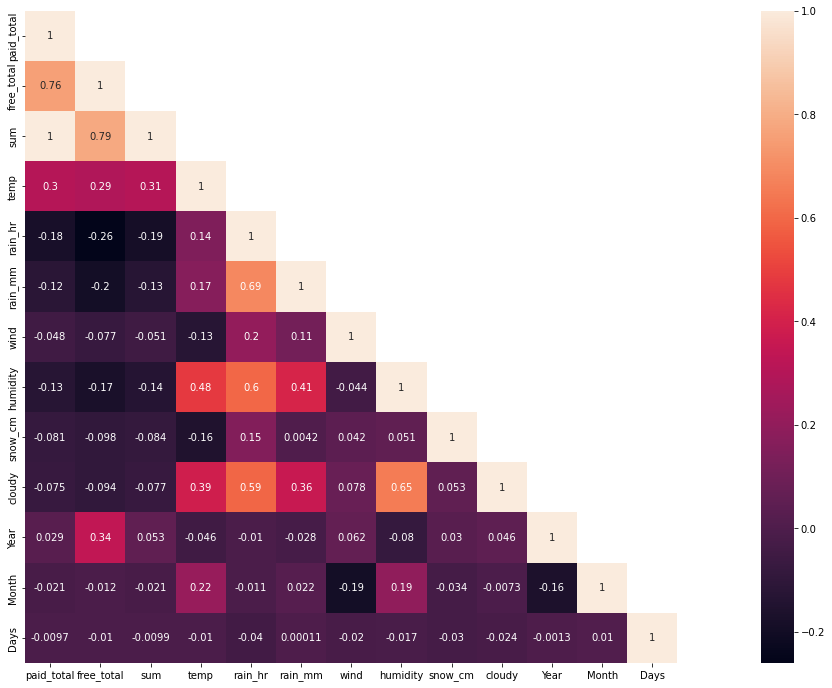

In [33]:
# corelation matrix

cor_mat= mg_re[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

C:\Users\kinsh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kinsh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


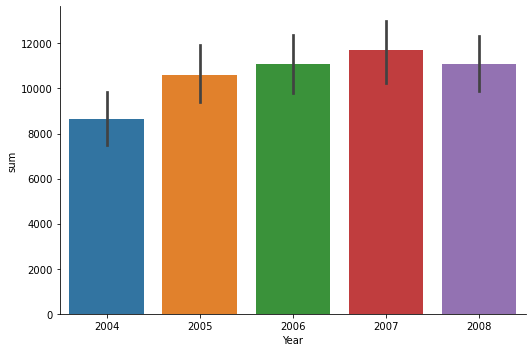

In [34]:
# 연간 방문자 추이

sns.factorplot(x="Year",y="sum",data=mg_re,kind='bar',size=5,aspect=1.5)

C:\Users\kinsh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kinsh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


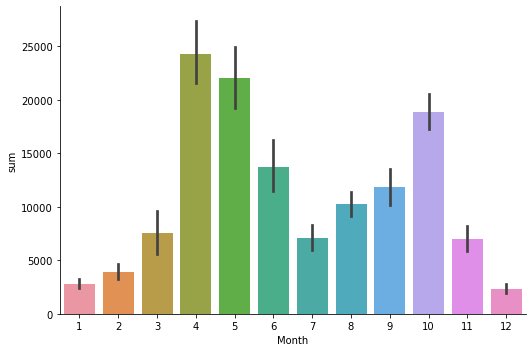

In [35]:
#월간 방문자 추이

sns.factorplot(x="Month",y="sum",data=mg_re,kind='bar',size=5,aspect=1.5)

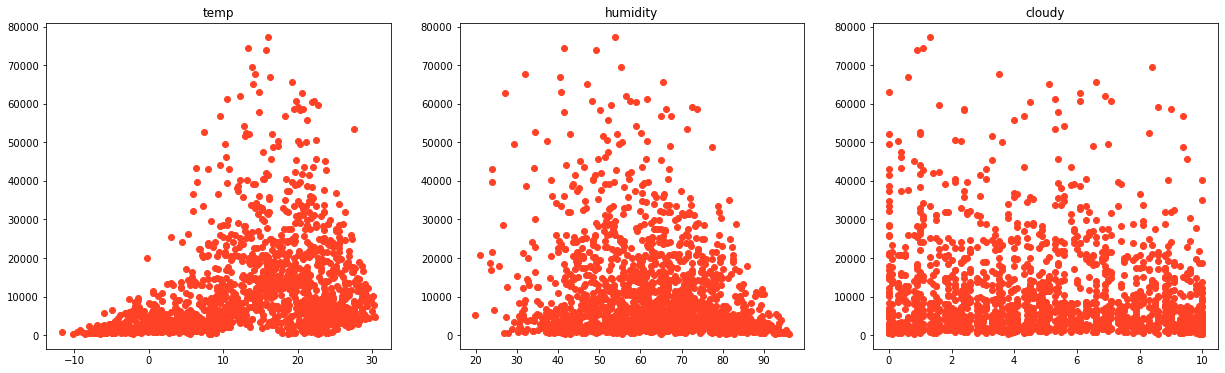

In [36]:
# 기온, 습도, 적운량에따른 방문자 산점도

fig, ax = plt.subplots(1,3, figsize=(21,6))
ax[0].scatter(x="temp",y="sum",data=mg_re,color='#ff4125')
ax[1].scatter(x="humidity",y="sum",data=mg_re,color='#ff4125')
ax[2].scatter(x="cloudy",y="sum",data=mg_re,color='#ff4125')

ax[0].set(title='temp')
ax[1].set(title='humidity')
ax[2].set(title='cloudy')
plt.show()

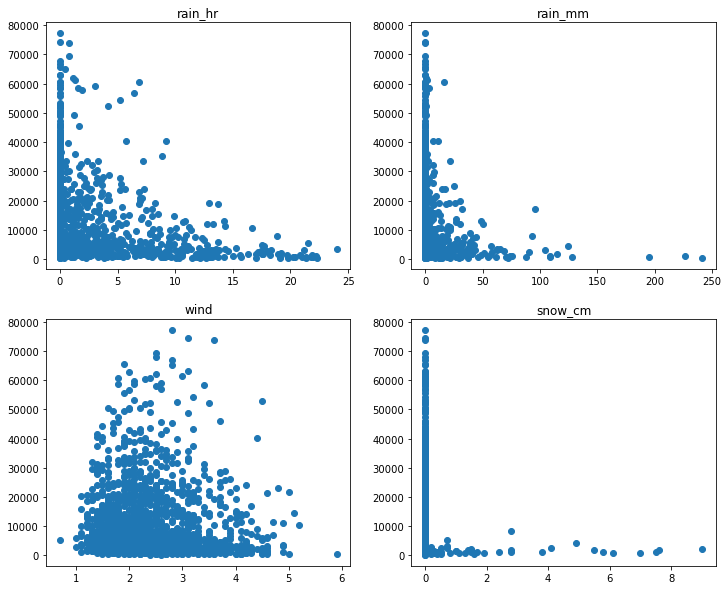

In [37]:
# 기온, 습도, 적운량에따른 방문자 산점도

fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0][0].scatter(x="rain_hr",y="sum",data=mg_re)
ax[0][1].scatter(x="rain_mm",y="sum",data=mg_re)
ax[1][0].scatter(x="wind",y="sum",data=mg_re)
ax[1][1].scatter(x="snow_cm",y="sum",data=mg_re)

ax[0][0].set(title='rain_hr')
ax[0][1].set(title='rain_mm')
ax[1][0].set(title='wind')
ax[1][1].set(title='snow_cm')

plt.show()

C:\Users\kinsh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\kinsh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


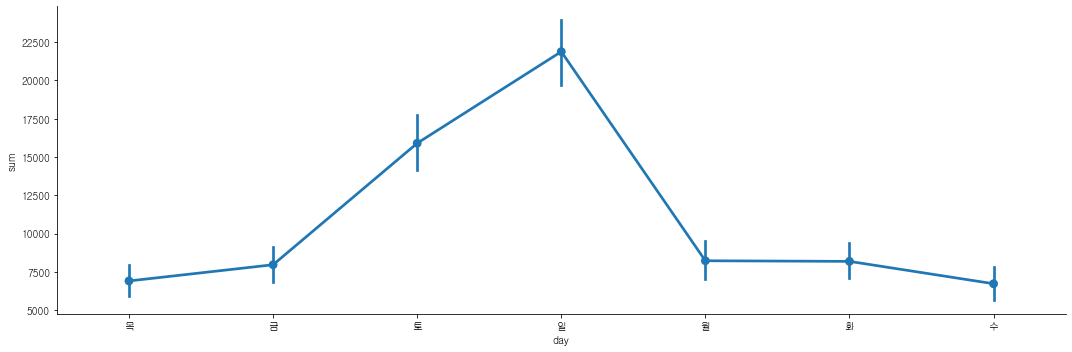

In [38]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
sns.factorplot(x='day',y='sum',data=mg_re,kind='point',size=5,aspect=3)

# 모델링

In [39]:
## 요일을 One-hot encoding 하고 이름 재설정 ##
one_hot = pd.get_dummies(mg_re['day'])
df_x = mg_re.drop('day', axis=1)
df_x = pd.concat([df_x, one_hot], axis=1) # column bind

df_x.rename(columns = {'월' : 'Mon', '화' : 'Tue', '수' : 'Wed', '목' : 'Thu',
                    '금' : 'Fri', '토' : 'Sat', '일' : 'Sun'}, inplace = True)

df = df_x
df

,dateName,date,paid_total,free_total,sum,temp,rain_hr,rain_mm,wind,humidity,...,Year,Month,Days,Fri,Thu,Wed,Mon,Sun,Sat,Tue
0,0,2004-07-01,2250,633,2883,24.0,7.37,4.5,1.9,77.0,...,2004,7,1,0,1,0,0,0,0,0
1,0,2004-07-02,1095,567,1662,23.1,18.88,10.5,1.9,90.8,...,2004,7,2,1,0,0,0,0,0,0
2,0,2004-07-03,5087,813,5900,24.4,7.42,10.5,1.0,85.9,...,2004,7,3,0,0,0,0,0,1,0
3,0,2004-07-04,536,255,791,21.1,21.35,62.0,4.5,92.1,...,2004,7,4,0,0,0,0,1,0,0
4,0,2004-07-05,1236,773,2009,22.8,6.75,14.0,3.8,80.5,...,2004,7,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0,2008-12-27,2632,1070,3702,-3.0,0.00,0.0,1.4,43.0,...,2008,12,27,0,0,0,0,0,1,0
1642,0,2008-12-28,5317,1147,6464,0.5,0.00,0.0,1.5,56.4,...,2008,12,28,0,0,0,0,1,0,0
1643,0,2008-12-29,1337,677,2014,1.0,2.00,0.5,2.6,66.5,...,2008,12,29,0,0,0,1,0,0,0
1644,0,2008-12-30,912,777,1689,-4.2,0.00,0.0,3.5,43.3,...,2008,12,30,0,0,0,0,0,0,1


In [47]:
df.describe()

,paid_total,free_total,sum,temp,rain_hr,rain_mm,wind,humidity,snow_cm,cloudy,Year,Month,Days,Fri,Thu,Wed,Mon,Sun,Sat,Tue
count,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000
mean,9480.466261,1352.393921,10832.860182,13.269726,2.053453,4.027538,2.384681,61.326748,0.059453,4.858663,2006.221277,6.855319,15.741641,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
std,11495.536578,921.826954,12207.110740,10.119281,4.118832,15.408313,0.769655,14.711437,0.526064,3.134065,1.316528,3.431602,8.808907,0.350034,0.350034,0.350034,0.350034,0.350034,0.350034,0.350034
min,70.000000,106.000000,299.000000,-11.700000,0.000000,0.000000,0.700000,19.900000,0.000000,0.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1707.000000,740.000000,2545.000000,4.600000,0.000000,0.000000,1.800000,50.300000,0.000000,2.100000,2005.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5010.000000,1107.000000,6184.000000,14.900000,0.000000,0.000000,2.200000,61.800000,0.000000,4.800000,2006.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12971.000000,1694.000000,14690.000000,22.300000,2.170000,0.500000,2.800000,71.600000,0.000000,7.600000,2007.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,74929.000000,8068.000000,77205.000000,30.400000,24.000000,241.000000,5.900000,96.000000,9.000000,10.000000,2008.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 

In [52]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(df[['temp', 'rain_hr', 'rain_mm', 'wind',
       'humidity', 'snow_cm', 'wind', 'humidity', 'snow_cm', 'cloudy', 'Holiday',
       'Fri', 'Thu', 'Wed', 'Mon', 'Sun', 'Sat', 'Tue']],\
        df[['sum']],test_size = 0.2, random_state = 42)

In [54]:
# scailing 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train)
print(x_test)

[[ 1.07526812 -0.50067147 -0.27052576 ... -0.41077841 -0.39677681
  -0.41456132]
 [ 0.71753256 -0.25989718 -0.23718132 ... -0.41077841 -0.39677681
  -0.41456132]
 [-0.05756118 -0.50067147 -0.27052576 ... -0.41077841 -0.39677681
  -0.41456132]
 ...
 [-0.02774988 -0.25989718 -0.27052576 ... -0.41077841 -0.39677681
  -0.41456132]
 [ 0.87652614  1.20401048  0.22964081 ...  2.43440255 -0.39677681
  -0.41456132]
 [ 1.3833182  -0.02393838 -0.20383688 ... -0.41077841 -0.39677681
  -0.41456132]]
[[ 0.3456057   0.11849732 -0.23091509 ... -0.39805867 -0.45291081
  -0.38254603]
 [ 0.31655009 -0.4910859  -0.23091509 ... -0.39805867 -0.45291081
  -0.38254603]
 [ 1.08168108  0.24444426  0.24135821 ...  2.51219249 -0.45291081
  -0.38254603]
 ...
 [-2.05632448 -0.4910859  -0.23091509 ...  2.51219249 -0.45291081
  -0.38254603]
 [-0.15802482  3.70798524  0.5660461  ... -0.39805867 -0.45291081
  -0.38254603]
 [-2.41467696 -0.4910859  -0.23091509 ... -0.39805867 -0.45291081
  -0.38254603]]


In [60]:
# 예측 정확률

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(rf.score(x_train,y_train))

C:\Users\kinsh\AppData\Local\Temp/ipykernel_14504/3746772536.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9543183611671756
